In [1]:
import sympy
sympy.init_printing()

In this notebook we consider the evolution of a binary due to some external potential. This is very similar to [Hamilton and rafikov 2019](https://arxiv.org/pdf/1902.01344.pdf). To get the average energy of the system, we need to average both over the short orbital period $T_i$ (subscript $i$ for inner) of the binary, and the long orbital period $T_o$ (subscript $o$ for outer) of the centre of mass in the external potential $\varphi$.

$\bar{U} = \frac{1}{T_o} \int_0^{T_o} dt \frac{1}{T_i} \int_0^{T_i} dt' \left[m_1 \varphi\left(\mathbf{s} \left(t \right ) + \mathbf{r}_1 \left(t' \right ) \right ) + m_2 \varphi \left(\mathbf{s}\left(t \right ) + \mathbf{r}_2 \left(t' \right ) \right ) \right]$

where $m_1$ is the mass of the first companion in the binaty, $m_2$ is the mass of the second companion, $\mathbf{s}$ is the position of the centre of mass, $\mathbf{r}_1$ is the position of the first mass relative to the centre of mass of the first companion and $\mathbf{r}_2$ is the position of the second mass relative to the centre of mass. Expanding the potential about the centre of mass yields

$\bar{U} \approx \frac{1}{T_o} \int_0^{T_o} dt \frac{1}{T_i} \int_0^{T_i} dt' \left[\left(m_1+m_2 \right ) \varphi\left(\mathbf{s} \left(t \right) \right) + \left(m_1 \mathbf{r}_1 \left(t' \right ) + m_2 \mathbf{r}_2 \left(t' \right ) \right ) \varphi'\left(\mathbf{s} \left(t \right ) \right ) \right] + $

$+ \frac{1}{T_o} \int_0^{T_o} dt \frac{1}{T_i} \int_0^{T_i} dt' \frac{1}{2}\left[m_1 \mathbf{r}_1 \left(t' \right ) \varphi'' \left(t \right ) \mathbf{r}_1 \left(t' \right ) + m_2 \mathbf{r}_2 \left(t' \right ) \varphi''\left(\mathbf{s}\left(t\right)\right ) \mathbf{r}_2 \left(t' \right )\right]$

The first order term does not depend on the binary parameters, so it just evaluates to a constant. The second order term vanishes since by definition of the centre of mass $m_1 \mathbf{r}_1 \left(t' \right ) + m_2 \mathbf{r}_2 \left(t' \right ) = 0$. The remaining term can be broken into two distinct integrals

$\bar{U} \approx C_0 + Tr \left\{\mathbf{T} \cdot \mathbf{I} \right\}$

where

$\mathbf{T} = \frac{1}{T_o}\int_0^{T_o} dt \varphi''\left(\mathbf{s} \left(t\right)\right)$

is the tidal tensor and

$\mathbf{I} = \frac{1}{2}\frac{1}{T_i} \int_0^{T_i} dt' \left(m_1 \mathbf{r}_1 \otimes \mathbf{r}_1 + m_2 \mathbf{r}_2 \otimes \mathbf{r}_2 \right)$

is the inertial tensor. We define a new variable $\mathbf{r} = \mathbf{r}_1 - \mathbf{r}_2$, so $\mathbf{r}_1 = \frac{m_2}{m_1 + m_2} \mathbf{r}$ and $\mathbf{r}_2 = -\frac{m_1}{m_1 + m_2} \mathbf{r}$, to obtain

$\mathbf{I} = \frac{1}{2} \frac{\mu}{T_i} \int_0^{T_i} dt' \mathbf{r} \otimes \mathbf{r}$

where $\mu = \frac{m_1 m_2}{m_1 + m_2}$ is the reduced mass and $\otimes$ is the [outer product](https://en.wikipedia.org/wiki/Outer_product). Using Kepler's third law, we can convert the time average to an average weighted by area

$\mathbf{I} = \frac{\mu}{2} \int_0^{2 \pi} r^2 \mathbf{r} \otimes \mathbf{r} d \theta / \int_0^{2 \pi} r^2 d\theta$

where $\theta$ is the true anomaly. The [Keplerian orbit](https://en.wikipedia.org/wiki/Kepler_orbit#Development_of_the_laws) is given by

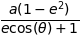

In [2]:
a = sympy.Symbol('a', positive=True) # Semi major axis of the binary
e = sympy.Symbol('e', positive=True) # Binary eccentricity
theta = sympy.Symbol('theta', positive=True) # True anomaly
kepler_radius = a*(1-e**2)/(1+e*sympy.cos(theta))
kepler_radius

In a coordinate system where the $x$ axis is aligned with the periapse and the $z$ axis is normal to the plane of motions, the position vector is given by

In [3]:
kepler_position = kepler_radius*sympy.Matrix([sympy.cos(theta), sympy.sin(theta), 0])
kepler_position

⎡  ⎛     2⎞       ⎤
⎢a⋅⎝1 - e ⎠⋅cos(θ)⎥
⎢─────────────────⎥
⎢   e⋅cos(θ) + 1  ⎥
⎢                 ⎥
⎢  ⎛     2⎞       ⎥
⎢a⋅⎝1 - e ⎠⋅sin(θ)⎥
⎢─────────────────⎥
⎢   e⋅cos(θ) + 1  ⎥
⎢                 ⎥
⎣        0        ⎦

The inertial tensor is given by

In [31]:
temp = kepler_radius**2
temp = temp.series(e,0,3).removeO()
temp = temp.integrate((theta,0,2*sympy.pi))
binary_normalisation = temp
binary_normalisation

In [34]:
mu = sympy.Symbol('mu', positive=True) # Reduced mass
temp = (mu/2)*kepler_position*kepler_position.T*kepler_radius**2/binary_normalisation
temp = [[temp[i,j].series(e,0,3).removeO() for i in range(3)] for j in range(3)]
temp = sympy.Matrix(temp)
temp = sympy.integrate(temp,(theta,0,2*sympy.pi))
temp = temp.simplify()
inertial_tensor = temp
inertial_tensor

⎡ 2   ⎛   2    ⎞                  ⎤
⎢a ⋅μ⋅⎝4⋅e  + 1⎠                  ⎥
⎢───────────────        0        0⎥
⎢       4                         ⎥
⎢                                 ⎥
⎢                  2   ⎛     2⎞   ⎥
⎢                 a ⋅μ⋅⎝1 - e ⎠   ⎥
⎢       0         ─────────────  0⎥
⎢                       4         ⎥
⎢                                 ⎥
⎣       0               0        0⎦

We proceed to calculate the tidal tensor, assuming the potential is due to a point mass $M \gg m_1, m_2$. The tidal tensor at each point is given by

In [35]:
G = sympy.Symbol('G', positive=True) # Gravitation constant
M = sympy.Symbol('M', positive=True) # Mass
x = sympy.Symbol('x', real=True) # x coordinate
y = sympy.Symbol('y', real=True) # y coordinate
z = sympy.Symbol('z', real=True) # z coordinate
temp = G*M/sympy.sqrt(x**2+y**2+z**2)
temp = [[temp.diff(var1).diff(var2) for var1 in [x,y,z]] for var2 in [x,y,z]]
temp = sympy.Matrix(temp)
local_tidal_tensor = temp
local_tidal_tensor

⎡            2                                                                
⎢     3⋅G⋅M⋅x               G⋅M                       3⋅G⋅M⋅x⋅y               
⎢───────────────── - ─────────────────            ─────────────────           
⎢              5/2                 3/2                          5/2           
⎢⎛ 2    2    2⎞      ⎛ 2    2    2⎞               ⎛ 2    2    2⎞              
⎢⎝x  + y  + z ⎠      ⎝x  + y  + z ⎠               ⎝x  + y  + z ⎠              
⎢                                                                             
⎢                                                   2                         
⎢              3⋅G⋅M⋅x⋅y                     3⋅G⋅M⋅y               G⋅M        
⎢          ─────────────────            ───────────────── - ───────────────── 
⎢                        5/2                          5/2                 3/2 
⎢          ⎛ 2    2    2⎞               ⎛ 2    2    2⎞      ⎛ 2    2    2⎞    
⎢          ⎝x  + y  + z ⎠               ⎝x  + y  + z

We time average over the orbit of the binary barycentre around $M$. We assume that it moves on a Keplerian orbit with semi major axis $A$ and eccentricity $E$

In [37]:
A = sympy.Symbol('A', positive=True) # Semi major axis of the outer orbit
E = sympy.Symbol('E', positive=True) # Eccentricity of the outer orbit
R = sympy.Symbol('R', positive=True) # Radius of the outer orbt
xi = sympy.Symbol('xi', positive=True) # Positive auxiliary variable
temp = local_tidal_tensor.subs(x, R*sympy.cos(theta))
temp = temp.subs(y, R*sympy.sin(theta))
temp = temp.subs(z, 0)
temp = temp*R**2
temp = temp.subs(R, A*(1-E**2)/(1+E*sympy.cos(theta)))
temp = sympy.simplify(temp)
temp = temp.subs(E**2-1,-xi)
temp = temp.subs(xi,1-E**2)
temp = temp.subs(1+E*sympy.cos(theta),xi)
temp = temp.subs(xi,1+E*sympy.cos(theta))
temp = sympy.Matrix([[temp[i,j].integrate((theta,0,2*sympy.pi)) for i in range(3)] for j in range(3)])
temp = temp/(2*sympy.pi*A**2/(1-E**2)**sympy.Rational(3,2))
temp = sympy.simplify(temp)
tidal_tensor = temp
tidal_tensor

⎡       ________                                    ⎤
⎢      ╱      2                                     ⎥
⎢G⋅M⋅╲╱  1 - E                                      ⎥
⎢───────────────         0                 0        ⎥
⎢         3                                         ⎥
⎢      2⋅A                                          ⎥
⎢                                                   ⎥
⎢                        ________                   ⎥
⎢                       ╱      2                    ⎥
⎢                 G⋅M⋅╲╱  1 - E                     ⎥
⎢       0         ───────────────          0        ⎥
⎢                          3                        ⎥
⎢                       2⋅A                         ⎥
⎢                                                   ⎥
⎢                                          ________ ⎥
⎢                                         ╱      2  ⎥
⎢                                  -G⋅M⋅╲╱  1 - E   ⎥
⎢       0                0         ─────────────────⎥
⎢                           

Each one of the calculations in the perivous sections was performed in a coordinate system that is aligned with the primary axes. To take into account the orientation of each orbit (binary vs. the motion of the barycentre) we introduce two rotation matrices. In the most general case three rotation matrices are needed, but because the tidal tensor has rotational symmetry in $x-y$ plane we only need two angle. One rotation angle is the mutual inclination between the two planes of motion

In [38]:
alpha = sympy.Symbol('alpha', positive=True) # Rotation angle
temp = [[sympy.cos(alpha),0,sympy.sin(alpha)],
        [0,1,0],
        [-sympy.sin(alpha),0, sympy.cos(alpha)]]
Rxz = sympy.Matrix(temp)
Rxz

⎡cos(α)   0  sin(α)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(α)  0  cos(α)⎦

The other rotation angle is the argument of periapse, i.e. the rotation axis is normal to the plane of motion, and it changes the angle between the lines of periapse

In [40]:
beta = sympy.Symbol('beta')
temp = [[sympy.cos(beta),sympy.sin(beta),0],
        [-sympy.sin(beta), sympy.cos(beta),0],
        [0,0,1]]
Rxy = sympy.Matrix(temp)
Rxy

⎡cos(β)   sin(β)  0⎤
⎢                  ⎥
⎢-sin(β)  cos(β)  0⎥
⎢                  ⎥
⎣   0       0     1⎦

Finally, we have Lidov Kozai ([von Zeipel](https://arxiv.org/pdf/1911.03984.pdf)?) doubly time averaged energy

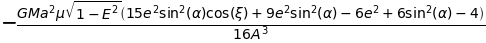

In [42]:
temp = Rxy*Rxz*tidal_tensor*Rxz.T*Rxy.T*inertial_tensor
temp = temp.trace()
temp = temp.simplify()
temp = temp.subs(sympy.sin(beta)**2, (1-sympy.cos(xi))/2) # Here xi = 2*beta is used to help with the double angle identities
temp = temp.subs(sympy.cos(beta)**2, 1-(1-sympy.cos(xi))/2)
temp = temp.simplify()
lk_energy = temp
lk_energy

We can show that this reduces to the more familiar form, i.e. equation B6 in Hamilton and Rafikov 2019

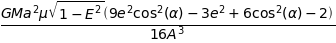

In [46]:
temp = lk_energy.subs(xi,sympy.pi/2)
temp = temp.subs(sympy.sin(alpha)**2,1-sympy.cos(alpha)**2)
temp.simplify()

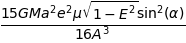

In [50]:
temp = lk_energy
temp = temp.diff(xi)
temp = temp.subs(xi,sympy.pi/2)
temp